In [1]:
%pylab inline
# %config InlineBackend.figure_format = 'svg'
import pandas as pd
import numpy as np
import time
from sklearn.cluster import DBSCAN
import pysal
from pysal.explore.esda import Moran
from matplotlib.colors import LinearSegmentedColormap

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

def xpercent_scale():
    gca().set_xticklabels(['{:.0f}%'.format(x*100) for x in gca().get_xticks()])
    
from mpl_toolkits.axes_grid.inset_locator import inset_axes
from som import SomNode
        
from util import *

Populating the interactive namespace from numpy and matplotlib


/data1/hms/anaconda3/envs/spatial/lib/python3.6/site-packages/pysal/lib/weights/util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')
/data1/hms/anaconda3/envs/spatial/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [7]:
dataname = '../slideseq_data/Puck_180819_11_'
df = pd.read_csv(dataname+'count.csv',sep=',',index_col=1)
corinfo = pd.read_csv(dataname+'idx.csv',sep=',',index_col=0)
del(df['ENSEMBL'])
print(df.shape)

(917, 1159)


In [8]:
corinfo["total_count"]=df.sum(0)

Text(0.5, 1.0, '0819_19')

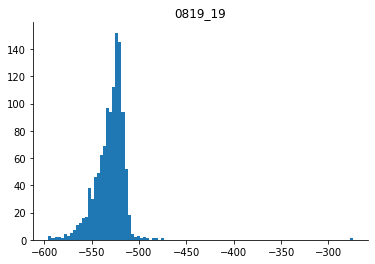

In [9]:
import NaiveDE,SpatialDE
# stablize,regress_out is gene by cell . However,  run is cell by gene
dfm = NaiveDE.stabilize(df)
res = NaiveDE.regress_out(corinfo, dfm, 'np.log(total_count)').T
figsize(6, 4)
plt.hist(res.sum(1),bins=100)
plt.title('0819_19')

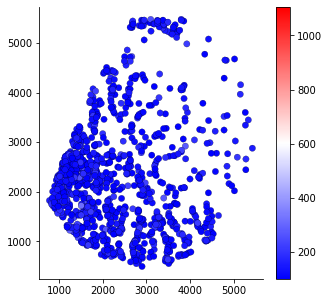

In [26]:
X=corinfo[['x','y']].values.astype(np.float32)
plotcount(X,corinfo,sp=40)

using 7*7 SOM nodes for 1159 points
CPU times: user 439 ms, sys: 25.1 ms, total: 464 ms
Wall time: 35.6 ms


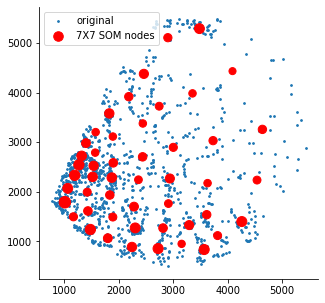

In [11]:
%time som4 = SomNode(X,20)
figsize(5,5)
som4.view()

In [12]:
%time ndf,ninfo = som4.mtx(df)
r1 ,numberq =som4.run()

CPU times: user 145 ms, sys: 992 µs, total: 146 ms
Wall time: 145 ms
norm mtx first


In [13]:
nres = som4.norm()

In [13]:
numberq

0

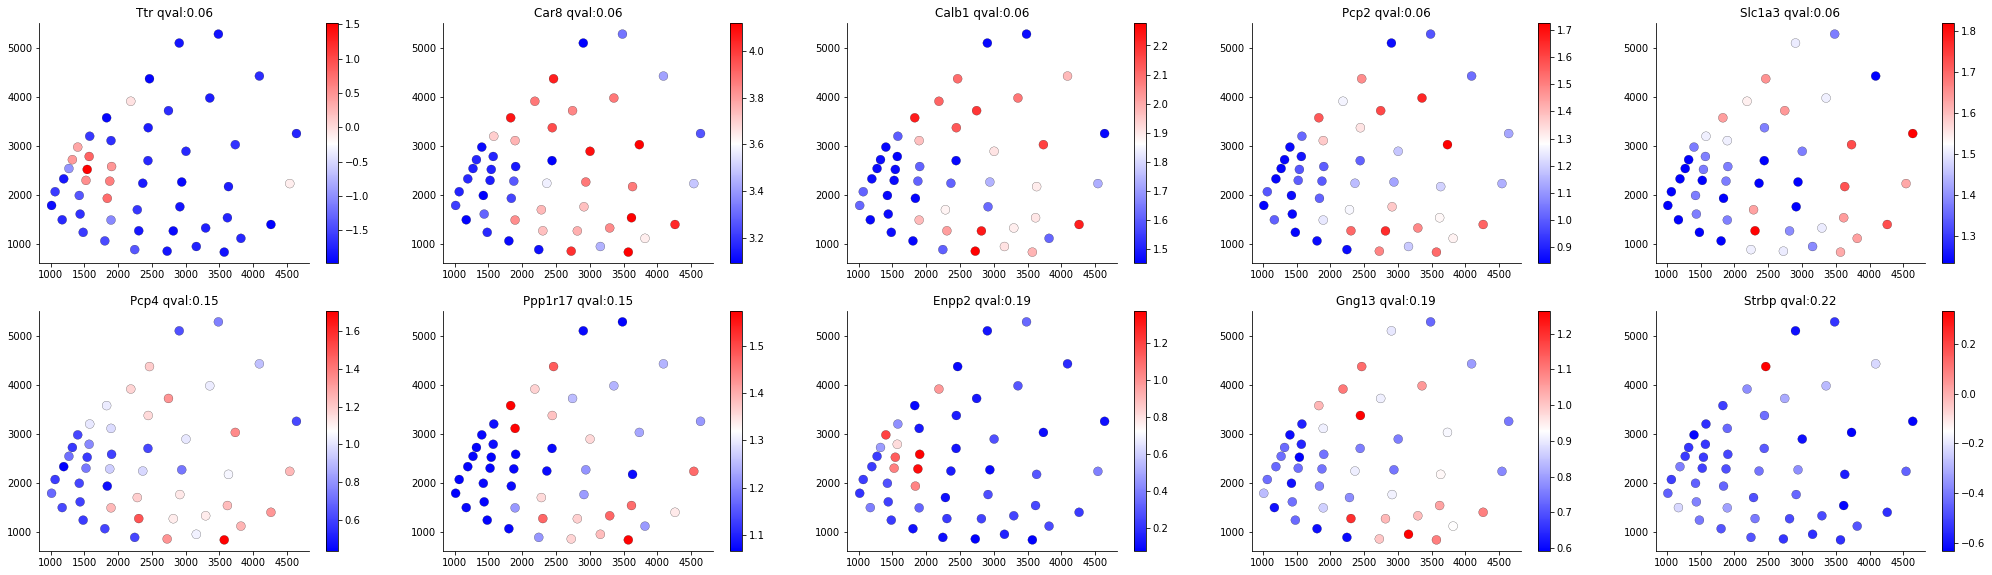

In [19]:
plotgene(ninfo[['x','y']].values,nres.T,r1.g.to_list()[:10],r1,sp=80,lw=0.2,plotsize=5)

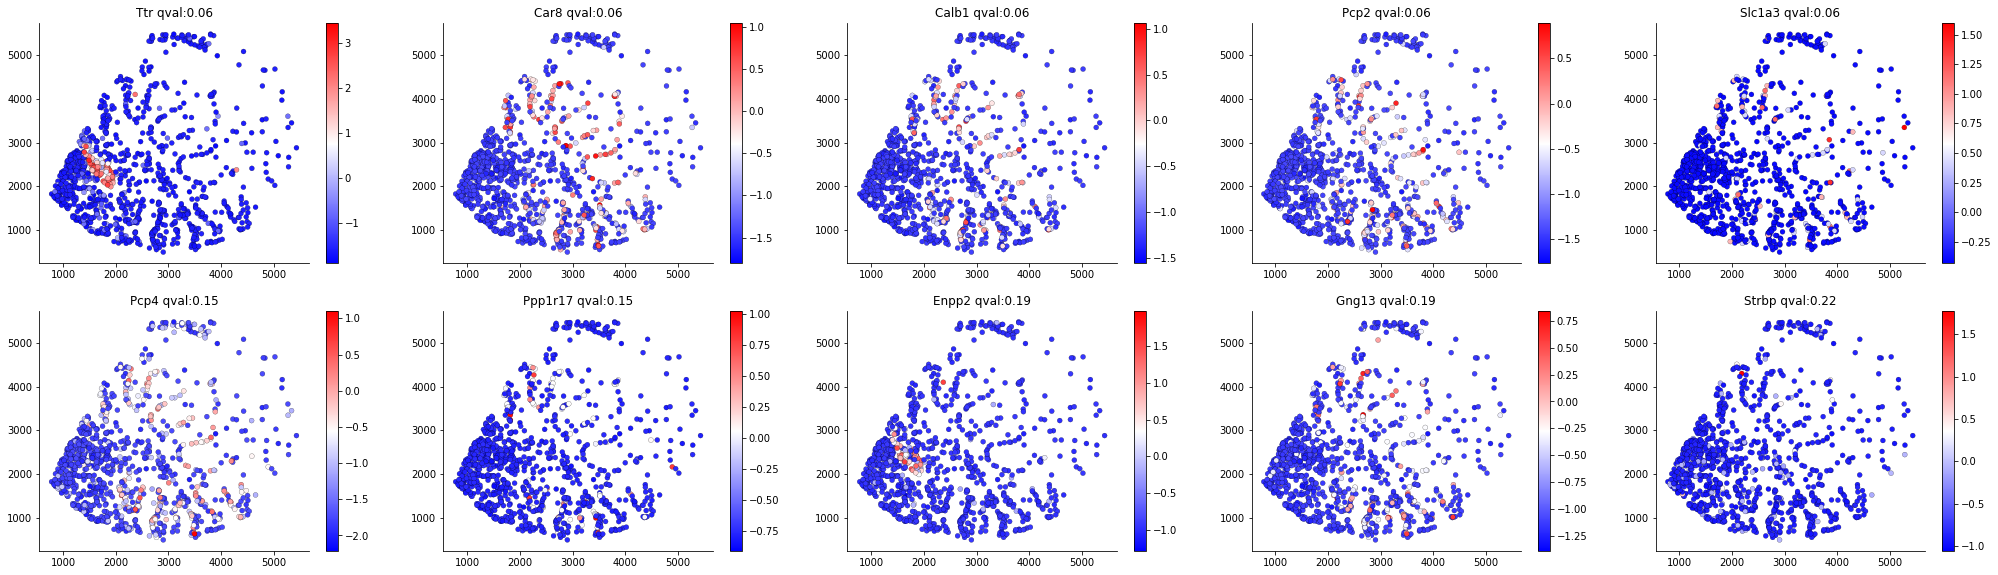

In [22]:
plotgene(corinfo[['x','y']].values,res.T,r1.g.to_list()[:10],r1,sp=25,lw=0.2,plotsize=5)

In [55]:
rr =[]
allr=[]
for i in range(4,26,2):
    X=corinfo[['x','y']].values.astype(np.float32)
    som20 = SomNode(X,i)
    ndf,ninfo = som20.mtx(df)
    X=ninfo[['x','y']].values.astype(float)
    # stablize,regress_out is gene by cell . However,  run is cell by gene
    dfm = NaiveDE.stabilize(ndf)
    nres = NaiveDE.regress_out(ninfo, dfm, 'np.log(total_count)').T
    lmin,lmax = get_l_limits(X)
    l = lmax*0.6+lmin*0.4
    kernel_space = {
                'SE': [l],
                'const': 0
            }
    %time result = SpatialDE.run(X, nres,kernel_space)
    result.sort_values('qval',inplace=True)
    rr.append(result.g.to_list())
    allr.append(result)

using 17*17 SOM nodes for 1158 points



CPU times: user 4.95 s, sys: 181 ms, total: 5.13 s
Wall time: 2.29 s
using 13*13 SOM nodes for 1158 points



CPU times: user 4.97 s, sys: 177 ms, total: 5.14 s
Wall time: 2.29 s
using 12*12 SOM nodes for 1158 points



CPU times: user 4.98 s, sys: 161 ms, total: 5.14 s
Wall time: 2.29 s
using 10*10 SOM nodes for 1158 points



CPU times: user 4.98 s, sys: 192 ms, total: 5.17 s
Wall time: 2.31 s
using 9*9 SOM nodes for 1158 points



CPU times: user 4.89 s, sys: 154 ms, total: 5.04 s
Wall time: 2.19 s
using 9*9 SOM nodes for 1158 points



CPU times: user 4.88 s, sys: 177 ms, total: 5.05 s
Wall time: 2.19 s
using 8*8 SOM nodes for 1158 points



CPU times: user 4.86 s, sys: 189 ms, total: 5.05 s
Wall time: 2.19 s
using 8*8 SOM nodes for 1158 points



CPU times: user 4.85 s, sys: 187 ms, total: 5.04 s
Wall time: 2.18 s
using 7*7 SOM nodes for 1158 points



CPU times: user 4.89 s, sys: 178 ms, total: 5.07 s
Wall time: 2.16 s
using 7*7 SOM nodes for 1158 points



CPU times: user 4.88 s, sys: 183 ms, total: 5.06 s
Wall time: 2.15 s
using 6*6 SOM nodes for 1158 points



CPU times: user 5.23 s, sys: 223 ms, total: 5.46 s
Wall time: 2.2 s


In [56]:
from scipy.stats.mstats import gmean
r1 = rr[0]
newr = []
for g in r1:
    tmpr =[]
    for r in rr:
        tmpr.append(r.index(g))
    newr.append(int(gmean(tmpr)))
fineg = [x for _,x in sorted(zip(newr,r1))]
print(fineg[:10])

['1700020I14Rik', 'Car8', 'Pura', 'Purb', 'Pvalb', 'Qdpr', 'Qk', 'Rab14', 'Rab2a', 'Rab3a']


/data1/hms/anaconda3/envs/spatial/lib/python3.6/site-packages/scipy/stats/stats.py:324: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


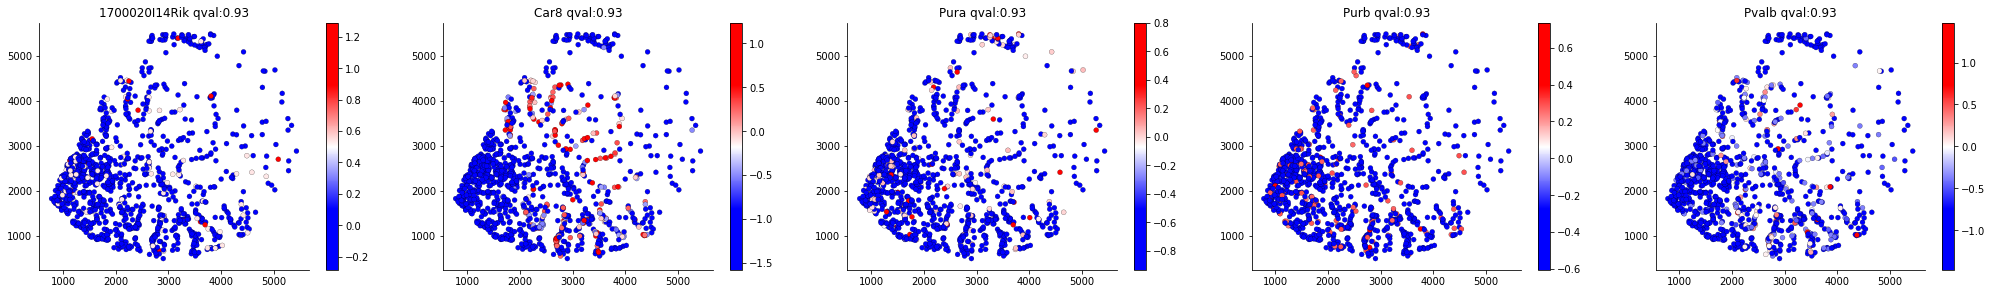

In [58]:
plotgene(corinfo[['x','y']].values,res.T,fineg[:5],result,25)

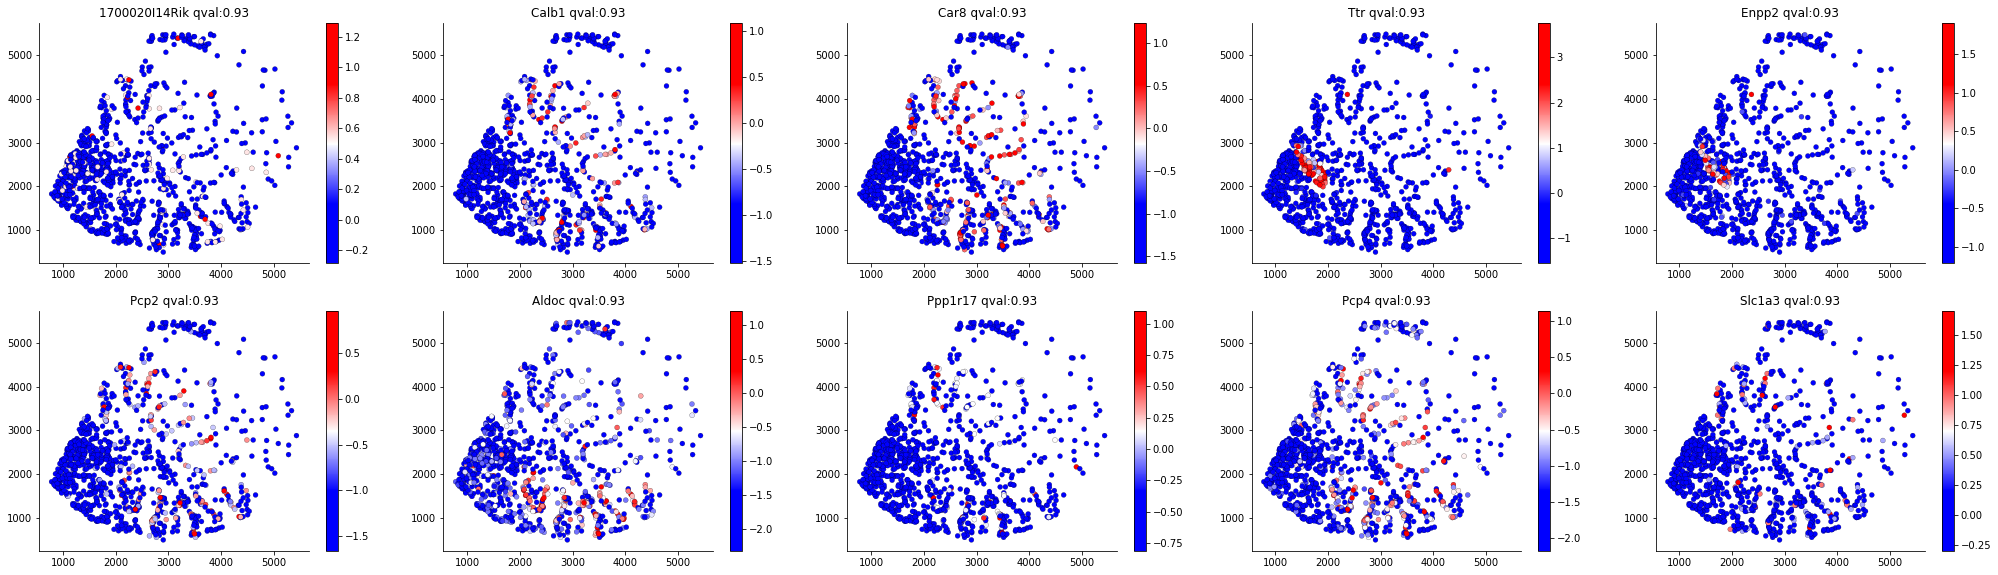

In [48]:
plotgene(corinfo[['x','y']].values,res.T,fineg[:10],result,25)

In [ ]:
for rr in allr:
    print(rr.head(50)['l'].value_counts())

In [20]:
oresult.sort_values('qval',inplace=True)
listA = oresult[oresult.qval<0.05].head(100).g.to_list()
print(len(listA))

58


['Gnb2', 'Clu', 'Tmem256', 'mt-Rnr1', 'S100a1', 'Gm26917', 'Meg3', 'Zwint', 'Gria2', 'Mt2', 'Camk2n1', 'Hpcal1', 'Nap1l5', 'Rgs7bp', 'Chchd10', 'Snhg11', 'Mir6236', 'Slc4a4', 'Kcnc3', 'Atp2b1', 'Ckmt1', 'Mt1', 'Pcp4l1', 'Sept4', 'Gatm'] 25


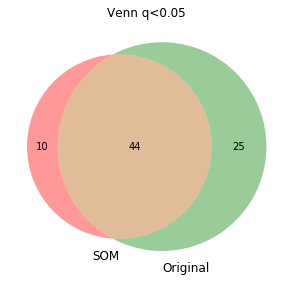

In [117]:
from matplotlib_venn import venn2
retB = list(set(listA).difference(set(fine)))
print(retB,len(retB))
figsize(5, 5)
plt.title('Venn q<0.05')
venn2([set(fine),set(listA)],set_labels=('SOM', 'Original'))
plt.show()

Populating the interactive namespace from numpy and matplotlib
63


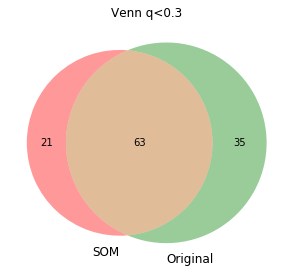

In [119]:
%pylab inline
fine = result[result.qval<=0.3].g.to_list()
listA = oresult[oresult.qval<0.3].g.to_list()
retB = list(set(fine).intersection(set(listA)))
print(len(retB))
figsize(5, 5)
plt.title('Venn q<0.3')
venn2([set(fine),set(listA)],set_labels=('SOM', 'Original'))
plt.show()

Populating the interactive namespace from numpy and matplotlib
['Nefh', 'Syne1', 'Stk39', 'Nrsn1', 'Celf4', 'Asph']


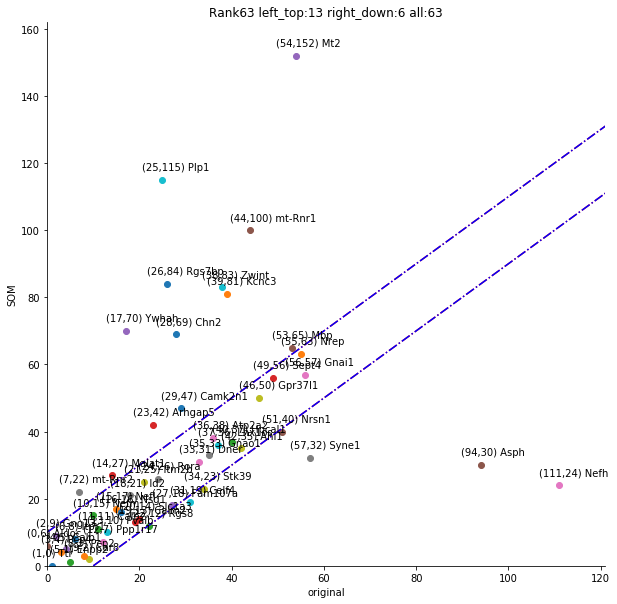

In [35]:
%pylab inline
figsize(10,10)
fine = result.head(33).g.to_list()
listA = oresult.head(58).g.to_list()
retB = list(set(fine).union(set(listA)))
orib,SOMb,good = draw_agree(retB,oresult.g.to_list(),result.g.to_list(),True,10)
print(SOMb)

In [36]:
print(good)

['Ttr', 'Nefl', 'Nefm', 'Gng13', 'Aldoc', 'Car8', 'Pcp2', 'Hpcal1', 'Slc1a3', 'Calb1', 'Atp2a2', 'Pvalb', 'Pcp4', 'Enpp2', 'Dner', 'Rora', 'Ahi1', 'Nsg1', 'Calb2', 'Calm2', 'Gnai1', 'Gnao1', 'Gpr37l1', 'Nrep', 'Rgs8', 'Sept4', 'Fam107a', 'Ppp1r17', 'Id2', 'Itm2b', 'Lhx1os', 'Itpr1']


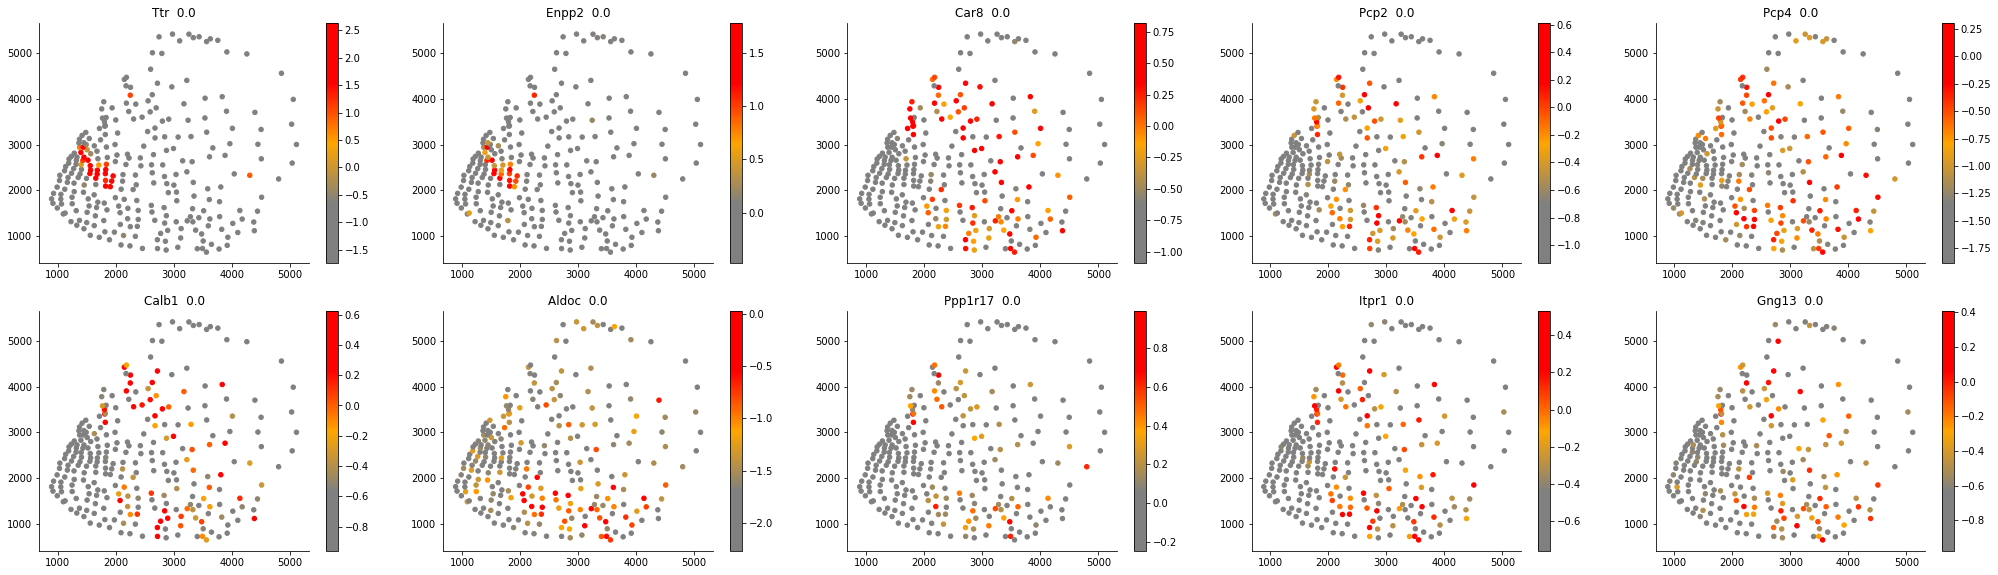

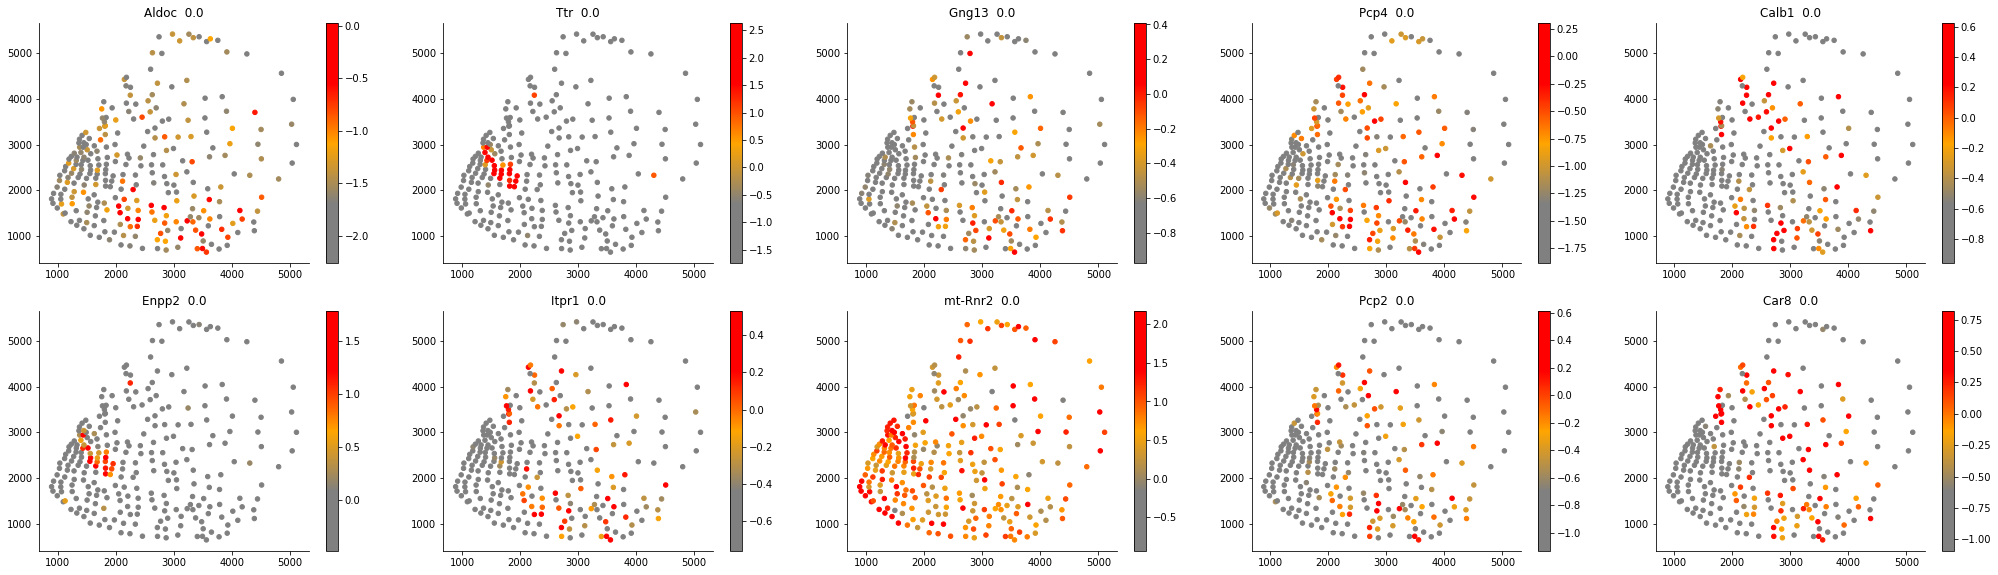

In [42]:
plotgene(ninfo[['x','y']].values,nres.T,result.head(10).g.to_list(),result,20)
# plotgene(corinfo[['x','y']].values,res.T,result.head(10).g.to_list(),result,2)
figure()
plotgene(ninfo[['x','y']].values,nres.T,oresult.head(10).g.to_list(),oresult,20)
# plotgene(corinfo[['x','y']].values,res.T,oresult.head(10).g.to_list(),oresult,2)

In [18]:
ttrl = []
for i in range(10):
    X=corinfo[['x','y']].values.astype(np.float32)
    %time som20 = SomNode(X,4,False) ;ndf,ninfo = som20.mtx(df)
    X=ninfo[['x','y']].values.astype(float)
    # stablize,regress_out is gene by cell . However,  run is cell by gene
    dfm = NaiveDE.stabilize(ndf)
    nres = NaiveDE.regress_out(ninfo, dfm, 'np.log(total_count)').T
    %time result = SpatialDE.run(X, nres)
    result.sort_values('qval',inplace=True)
    r1 = result
    fine = result[result.qval<=0.1].head(100).g.to_list()
    print(len(fine))
    ttrl.append(result.g.to_list().index('Pcp4')+1)

CPU times: user 4.3 s, sys: 182 ms, total: 4.48 s
Wall time: 744 ms



CPU times: user 22.5 s, sys: 239 ms, total: 22.7 s
Wall time: 19.3 s
46
CPU times: user 4.15 s, sys: 170 ms, total: 4.32 s
Wall time: 770 ms



CPU times: user 22.5 s, sys: 243 ms, total: 22.8 s
Wall time: 19.4 s
31
CPU times: user 4.16 s, sys: 169 ms, total: 4.33 s
Wall time: 786 ms



CPU times: user 22.3 s, sys: 237 ms, total: 22.6 s
Wall time: 19.1 s
28
CPU times: user 4.15 s, sys: 175 ms, total: 4.32 s
Wall time: 772 ms



CPU times: user 23.1 s, sys: 232 ms, total: 23.4 s
Wall time: 20 s
36
CPU times: user 4.19 s, sys: 187 ms, total: 4.38 s
Wall time: 782 ms



CPU times: user 22.8 s, sys: 245 ms, total: 23 s
Wall time: 19.7 s
34
CPU times: user 4.14 s, sys: 188 ms, total: 4.33 s
Wall time: 778 ms



CPU times: user 22.1 s, sys: 223 ms, total: 22.3 s
Wall time: 18.9 s
56
CPU times: user 4.21 s, sys: 210 ms, total: 4.42 s
Wall time: 775 ms



CPU times: user 22.8 s, sys: 238 ms, total: 23.1 s
Wall time: 19.5 s
31
CPU times: user 4.19 s, sys: 161 ms, total: 4.35 s
Wall time: 779 ms



CPU times: user 23.7 s, sys: 248 ms, total: 23.9 s
Wall time: 20.6 s
28
CPU times: user 4.17 s, sys: 163 ms, total: 4.33 s
Wall time: 787 ms



CPU times: user 23.1 s, sys: 239 ms, total: 23.4 s
Wall time: 20 s
55
CPU times: user 4.19 s, sys: 154 ms, total: 4.34 s
Wall time: 787 ms



CPU times: user 22.6 s, sys: 227 ms, total: 22.8 s
Wall time: 19.4 s
52


Text(0, 0.5, 'rank')

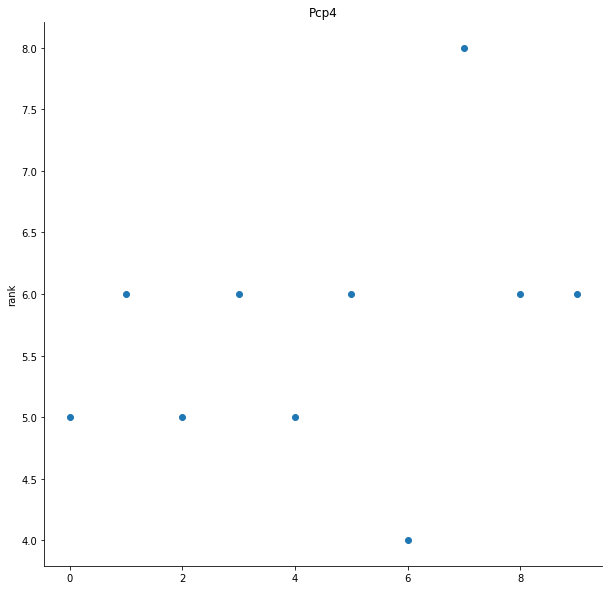

In [20]:
plt.scatter(range(len(ttrl)),ttrl)
plt.title('Pcp4')
plt.ylabel('rank')

using 17*17 SOM nodes for 1158 points
CPU times: user 673 ms, sys: 25 ms, total: 698 ms
Wall time: 46.4 ms
CPU times: user 3.56 s, sys: 176 ms, total: 3.74 s
Wall time: 704 ms



CPU times: user 22.1 s, sys: 243 ms, total: 22.4 s
Wall time: 19 s
54


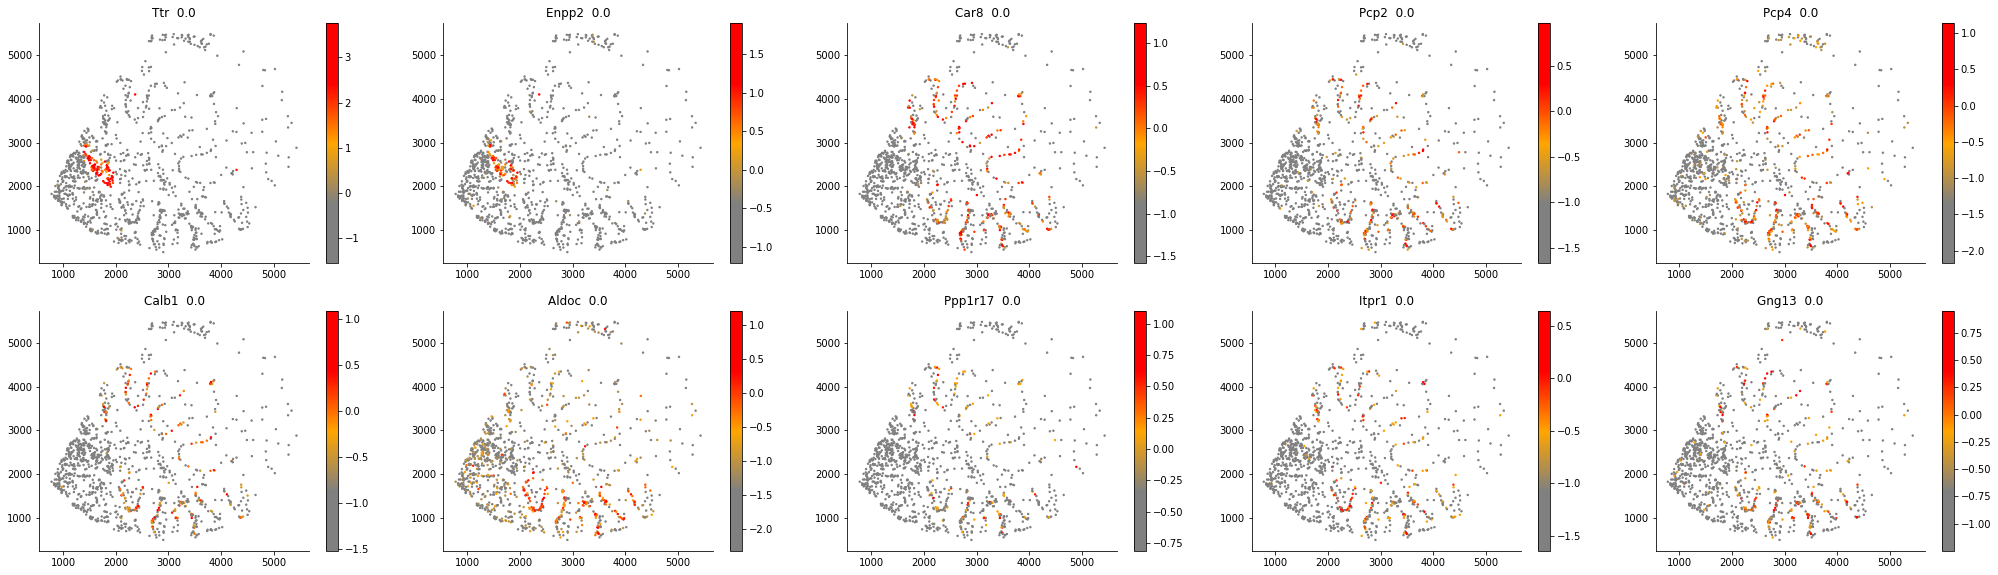

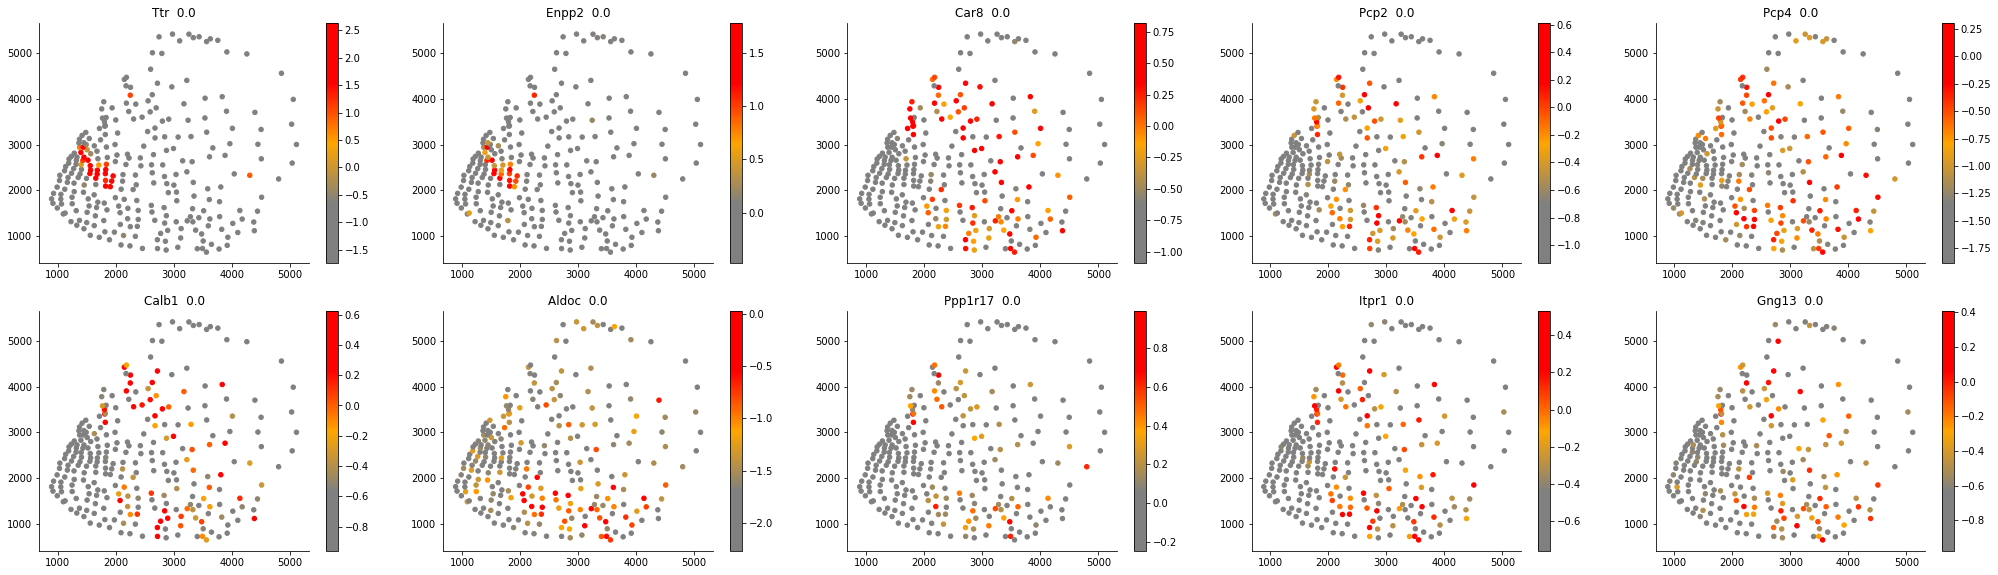

In [14]:
X=corinfo[['x','y']].values.astype(np.float32)
%time som20 = SomNode(X,4)
%time ndf,ninfo = som20.mtx(df)
X=ninfo[['x','y']].values.astype(float)
# stablize,regress_out is gene by cell . However,  run is cell by gene
dfm = NaiveDE.stabilize(ndf)
nres = NaiveDE.regress_out(ninfo, dfm, 'np.log(total_count)').T
%time result = SpatialDE.run(X, nres)
result.sort_values('qval',inplace=True)
r2 = result
fine = result[result.qval<=0.1].head(100).g.to_list()
print(len(fine))
plotgene(corinfo[['x','y']].values,res.T,result.head(10).g.to_list(),result,2)
figure()
plotgene(ninfo[['x','y']].values,nres.T,result.head(10).g.to_list(),result,20)

using 17*17 SOM nodes for 1158 points
CPU times: user 1.04 s, sys: 40.7 ms, total: 1.08 s
Wall time: 67.9 ms
CPU times: user 3.43 s, sys: 166 ms, total: 3.6 s
Wall time: 681 ms



CPU times: user 20.1 s, sys: 280 ms, total: 20.4 s
Wall time: 17.1 s
65


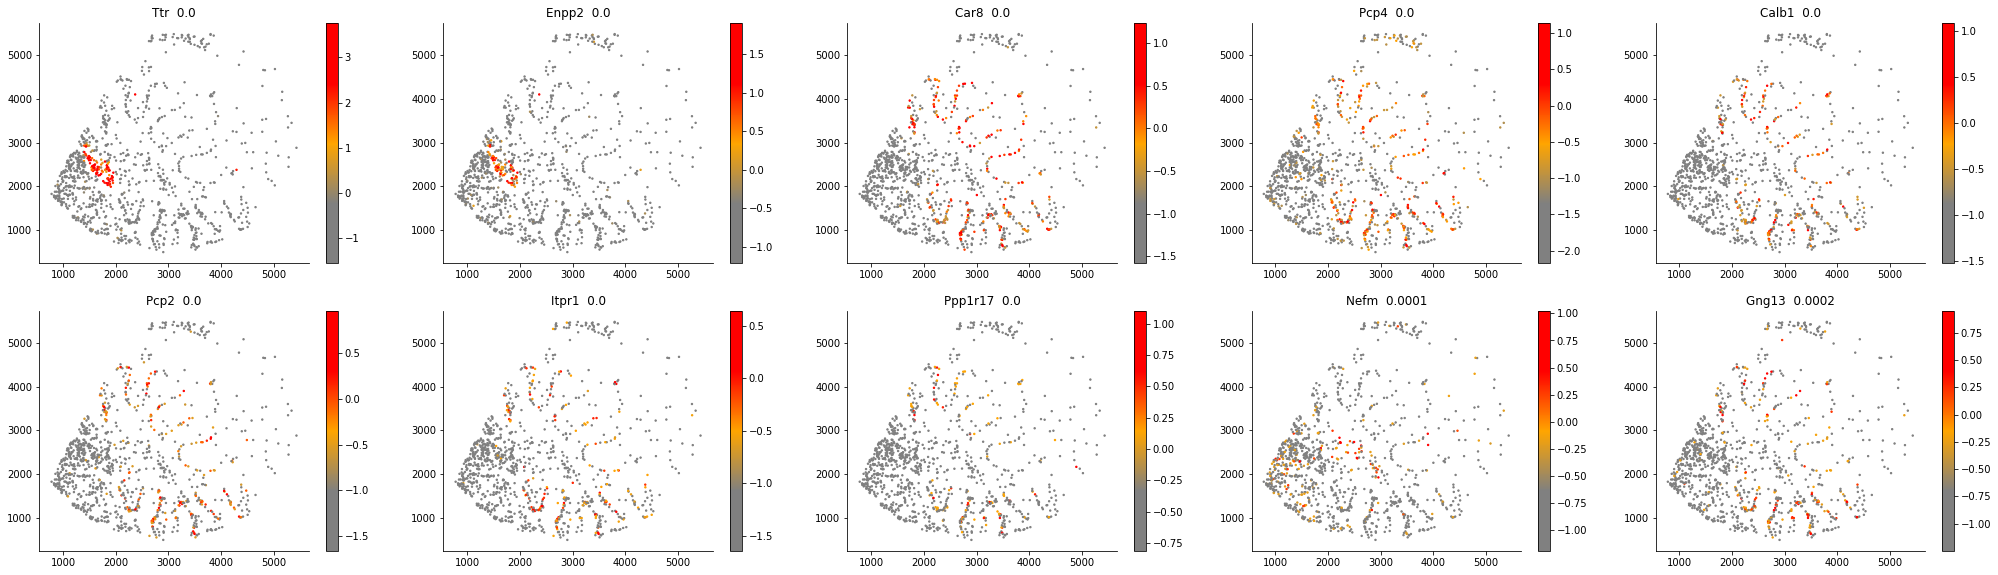

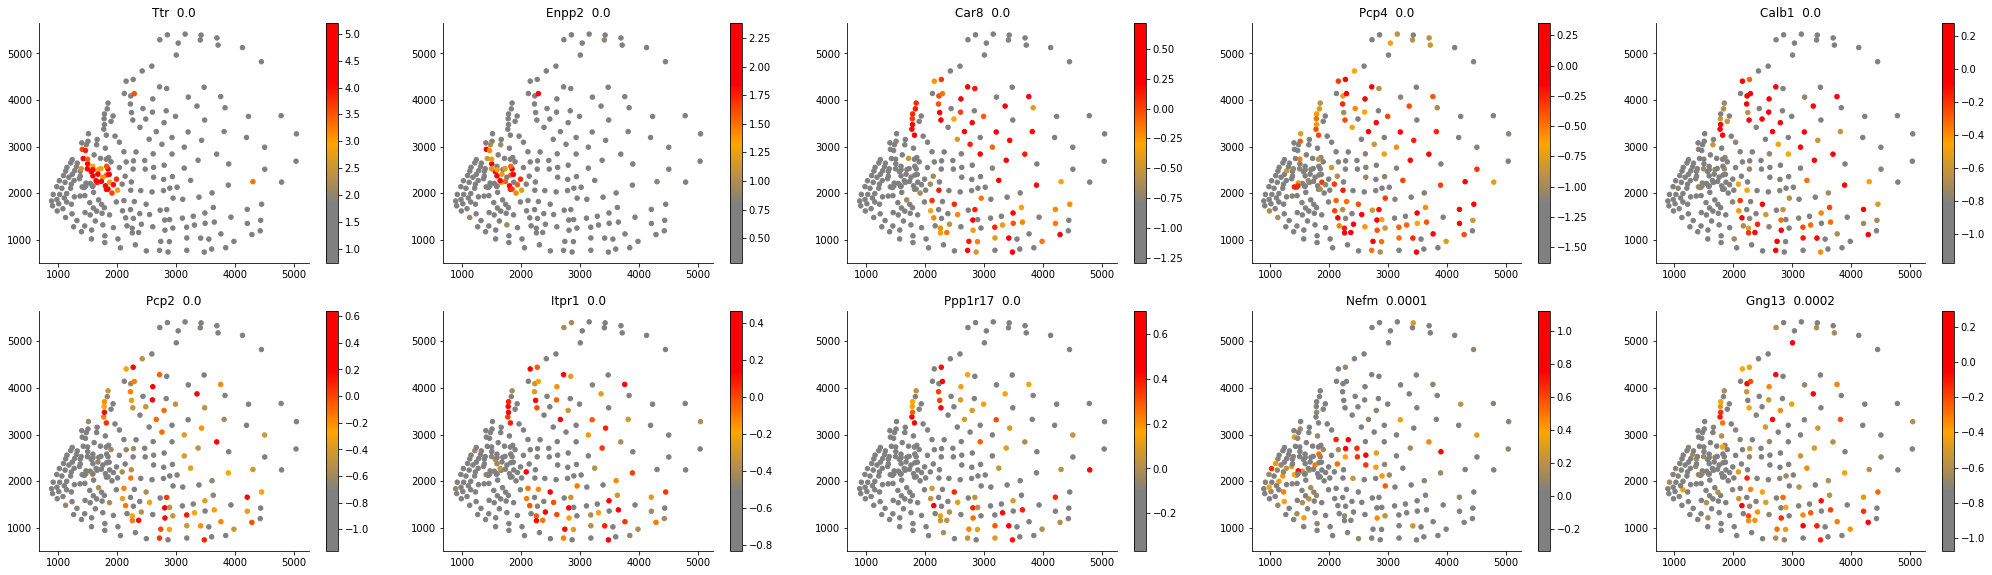

In [24]:
X=corinfo[['x','y']].values.astype(np.float32)
%time som20 = SomNode(X,4)
%time ndf,ninfo = som20.mtx(df)
X=ninfo[['x','y']].values.astype(float)
# stablize,regress_out is gene by cell . However,  run is cell by gene
dfm = NaiveDE.stabilize(ndf)
nres = NaiveDE.regress_out(ninfo, dfm, 'np.log(total_count)').T
%time result = SpatialDE.run(X, nres)
result.sort_values('qval',inplace=True)
r3 = result
fine = result[result.qval<=0.1].head(100).g.to_list()
print(len(fine))
plotgene(corinfo[['x','y']].values,res.T,result.head(10).g.to_list(),result,2)
figure()
plotgene(ninfo[['x','y']].values,nres.T,result.head(10).g.to_list(),result,20)

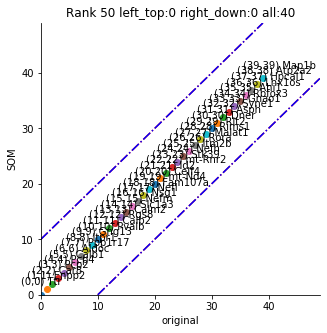

In [15]:
figsize(5,5)
orib,SOMb,good = draw_agree(r1.g.to_list()[:40],r1.g.to_list(),r2.g.to_list(),True,10)

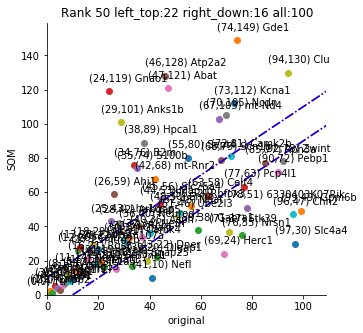

In [29]:
figsize(5,5)
orib,SOMb,good = draw_agree(r2.g.to_list()[:100],r2.g.to_list(),r3.g.to_list(),True,10)

In [108]:
X = ninfo[['x','y']].values.astype(np.float32)
print(X.shape)
I = np.eye(X.shape[0])


(268, 2)


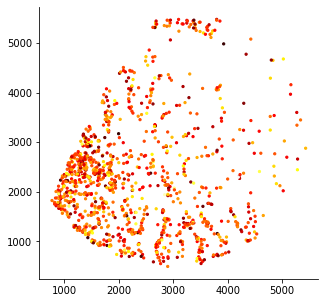

In [107]:
figsize(5,5)
ranY = np.random.multivariate_normal(0 * X[:, 0]+1.5, 1.5*I)
plt.scatter(*X.T, c=ranY, s=5,cmap='hot');

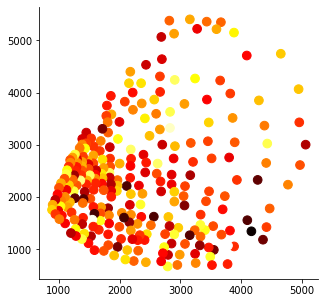

In [109]:
figsize(5,5)
ranY = np.random.multivariate_normal(0 * X[:, 0]+1.5, 1.5*I)
plt.scatter(*X.T, c=ranY, s=75,cmap='hot');

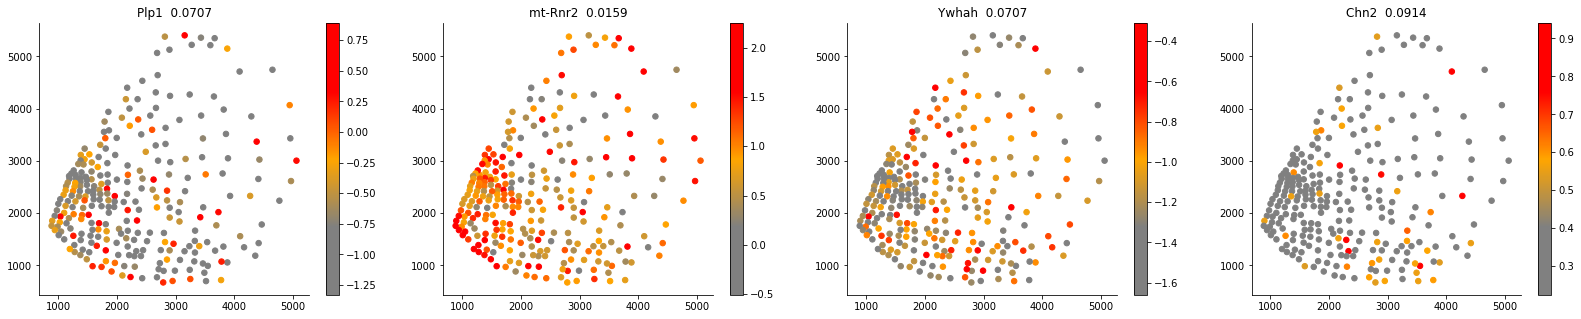

In [103]:
plotgene(ninfo[['x','y']].values,nres.T,orib,result,30)

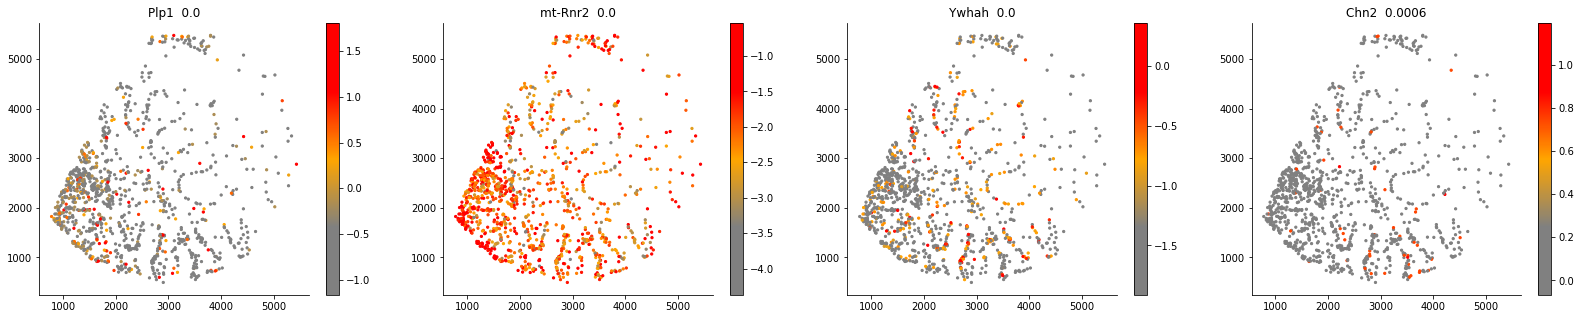

In [71]:
plotgene(corinfo[['x','y']].values,res.T,orib,oresult,5)

In [ ]:
plotgene(corinfo[['x','y']].values,res.T,list(set(fine).intersection(set(listA))),oresult,10)

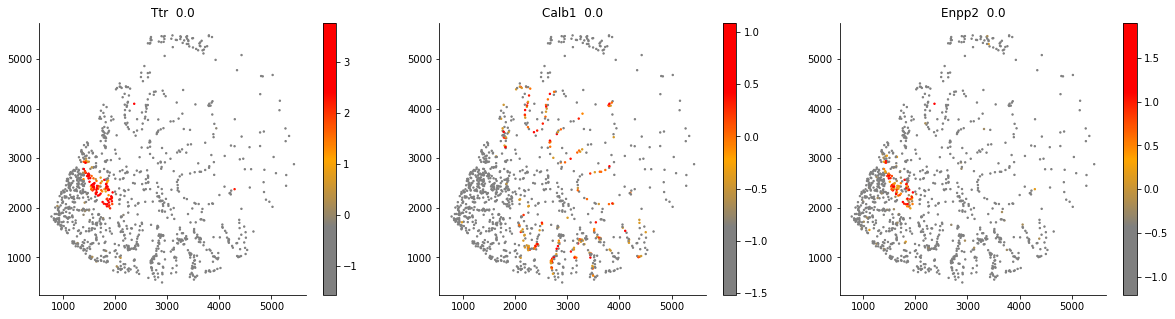

In [45]:
plotgene(corinfo[['x','y']].values,res.T,['Ttr','Calb1','Enpp2'],oresult,2)

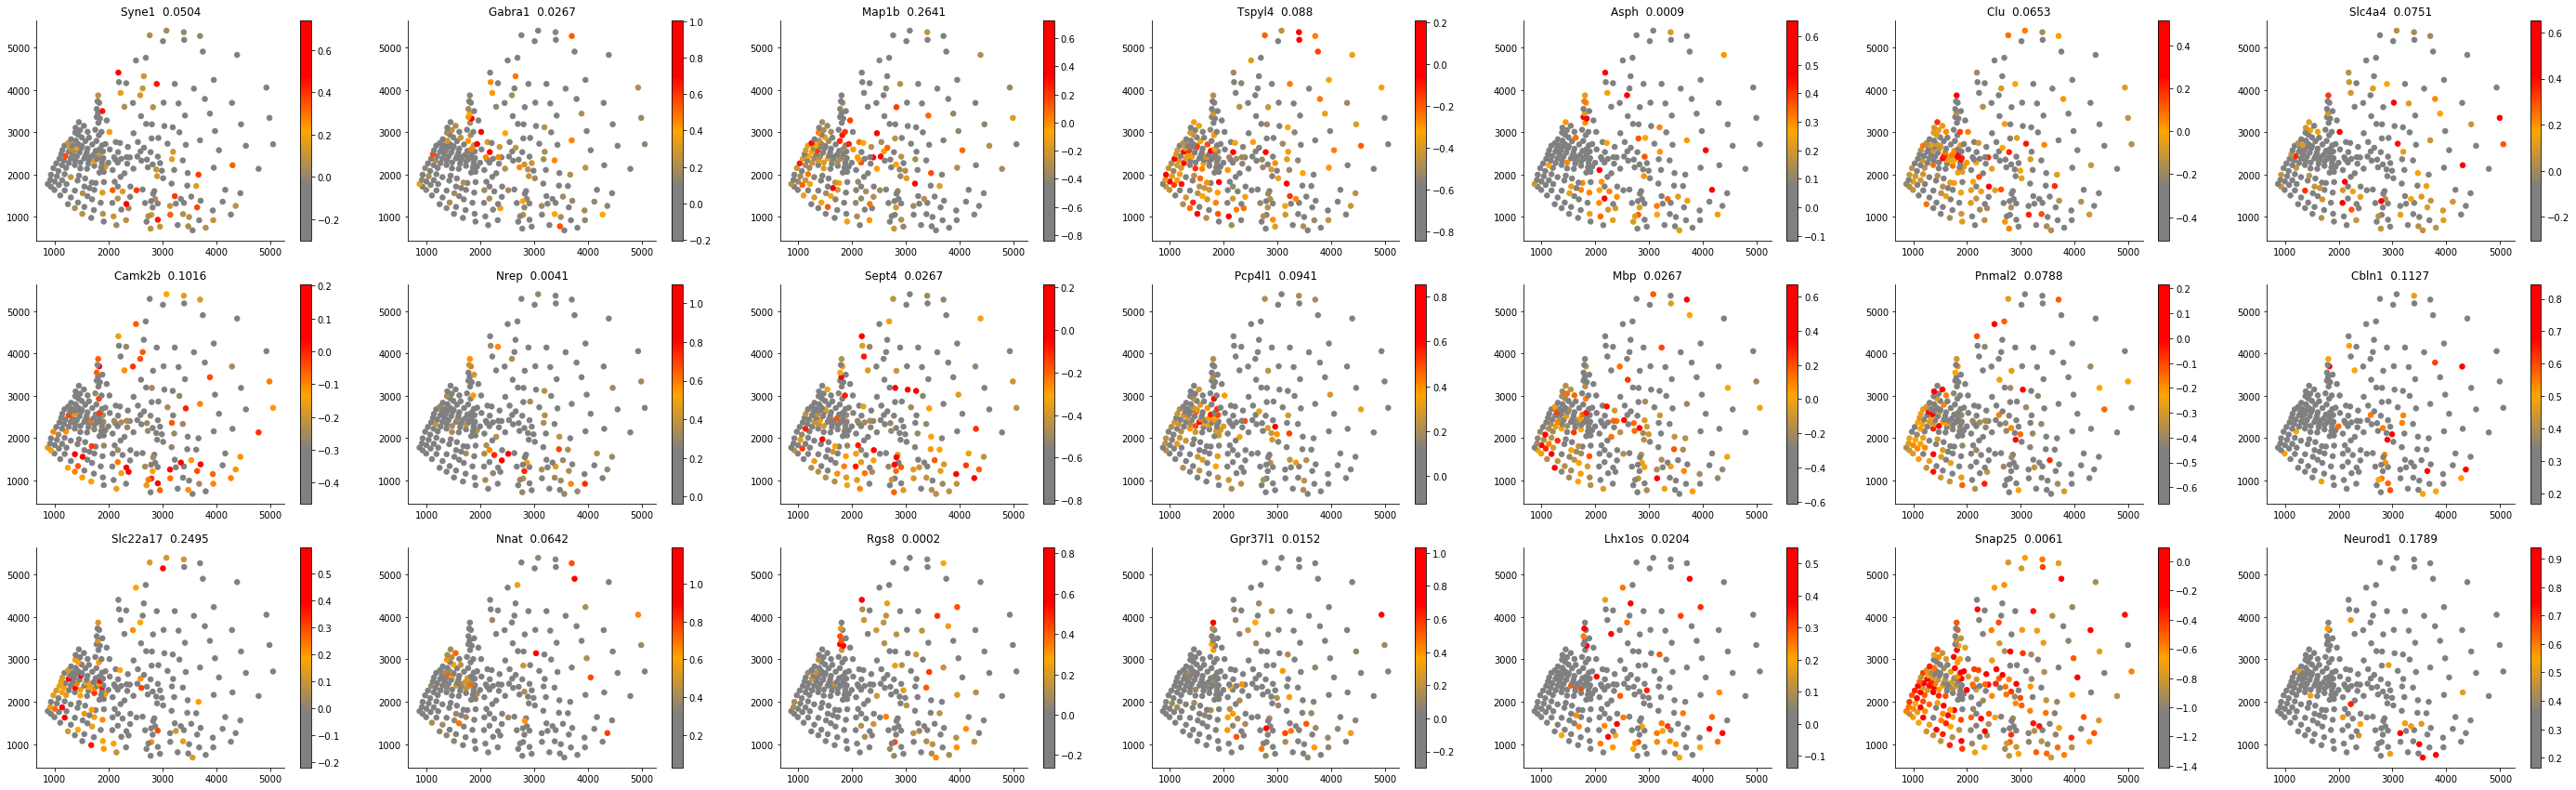

In [52]:
# good = oresult.head(10).g.to_list()
plotgene(ninfo[['x','y']].values,nres.T,SOMb,result,30)

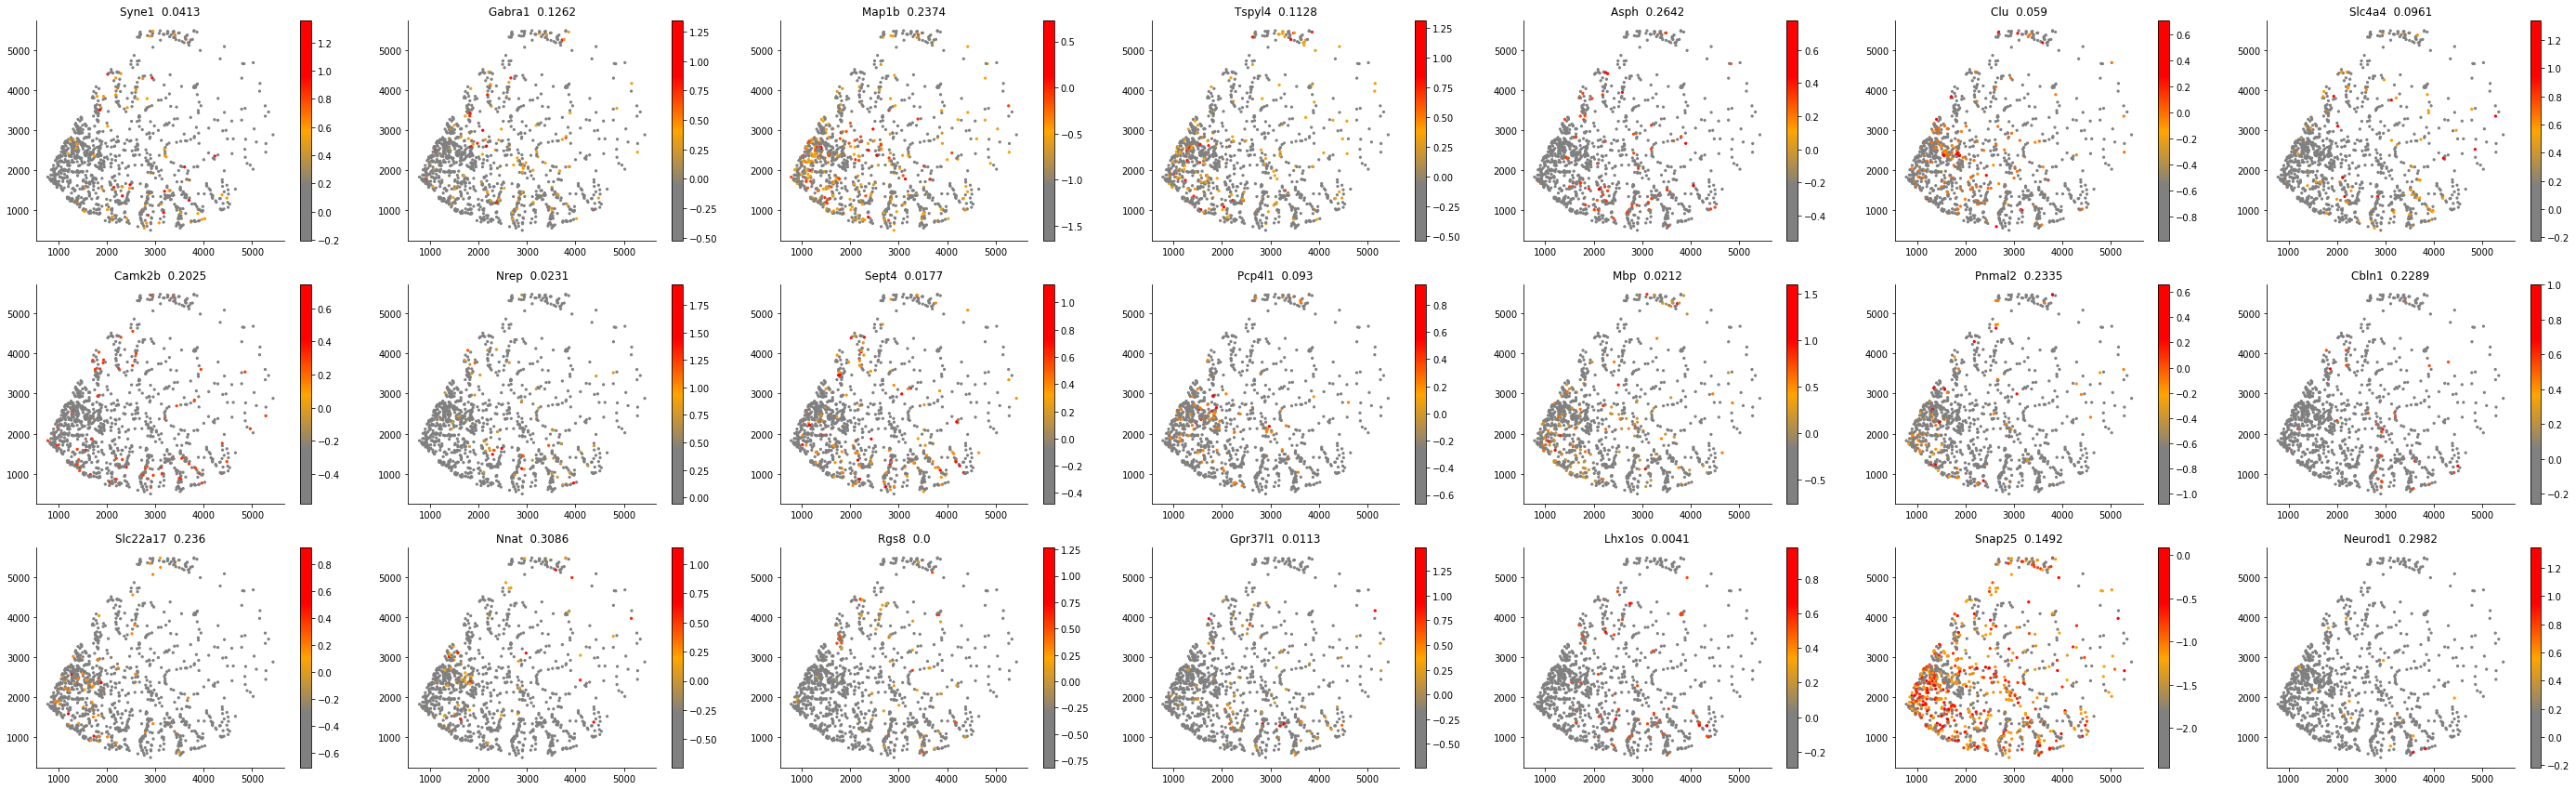

In [53]:
plotgene(corinfo[['x','y']].values,res.T,SOMb,oresult,5)

In [ ]:
good = result.head(30).g.to_list()
plotgene(ninfo[['x','y']].values,nres.T,good,result,10)

In [ ]:
plotgene(corinfo[['x','y']].values,res.T,good,result,1)

In [ ]:
%pylab inline
figsize(5,5)
plt.scatter(-np.log(result.qval.values),result.FSV.values)

In [ ]:
plotgene(corinfo[['x','y']].values,res.T,good,oresult,8)

In [ ]:
# retB = list(set(listA).intersection(set(fine)))
# retB = list(set(fine).difference(set(listA)))
plotgene(ninfo[['x','y']].values,nres.T,SOMb,result,20)

In [ ]:
plotgene(corinfo[['x','y']].values,res.T,SOMb,oresult,5)

In [ ]:
from sklearn import metrics 
score=[]
for i in range(2,100):
    model = AgglomerativeClustering(n_clusters=i,compute_full_tree=True)
    labels = model.fit_predict(res.T)
    score.append(metrics.davies_bouldin_score(res.T, labels))

In [ ]:
figsize(5,5)
plt.scatter(np.arange(2,100),score)

In [64]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=20,compute_full_tree=True)
labels = model.fit_predict(res.T)
#plt.scatter(X[:,0], X[:,1], c=labels,s=3)
#plt.show()
print(labels.shape,df.shape)

(917,) (917, 1158)


In [65]:
X = X.values

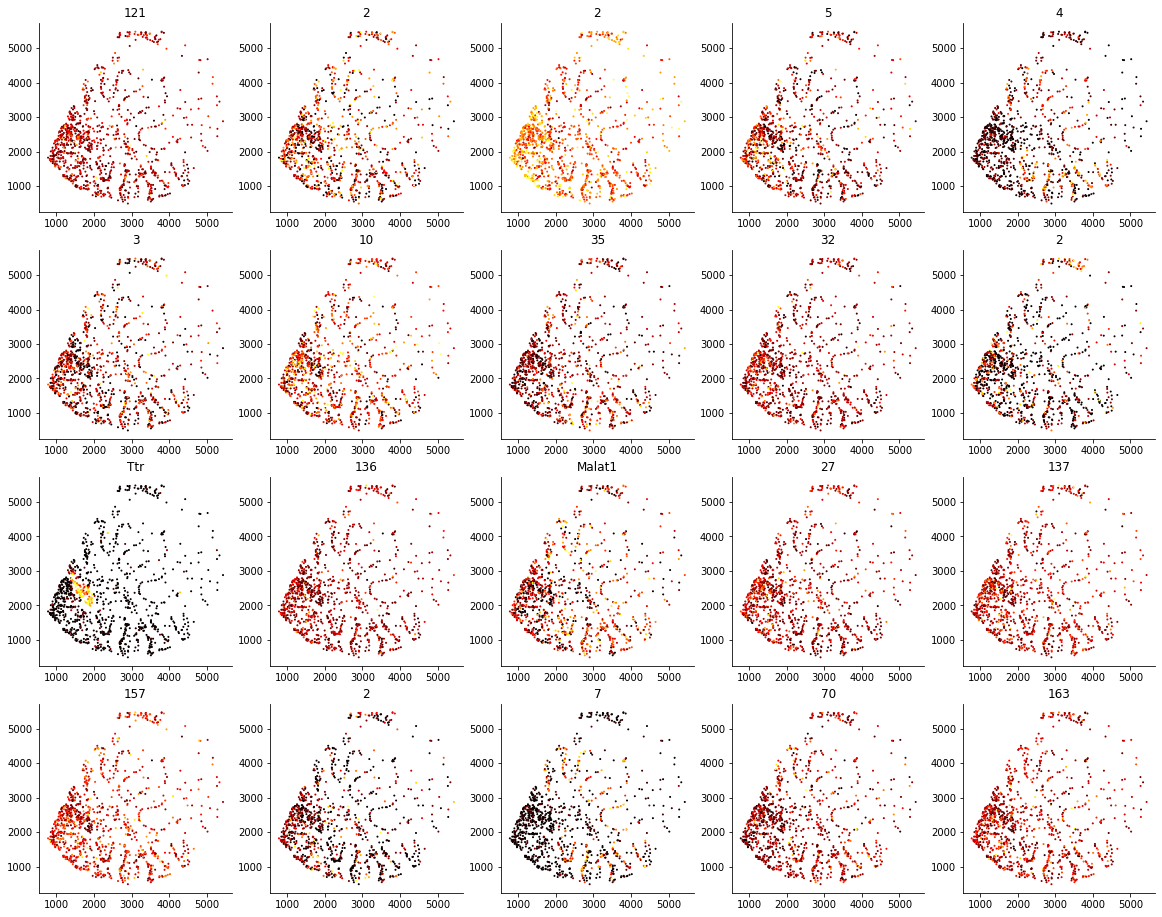

In [66]:
figsize(20,16)
for i in range(20):
    t = i+1
    plt.subplot(4,5,t%4+t//4*4)
    plt.scatter(X[:,0], X[:,1], c=np.log2(np.squeeze(np.mean(df[labels==i],axis=0))+1),s=1,cmap='hot')
    plt.title(str(df[labels==i].shape[0]))
    if df[labels==i].shape[0]==1:
        plt.title(df[labels==i]._stat_axis.values.tolist()[0])

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=20,compute_full_tree=True)
labels_res = model.fit_predict(res.T)
sl=[]
figsize(25,16)
for i in range(20):
    t = i+1
    plt.subplot(4,5,t%4+t//4*4)
    plt.scatter(X[:,0], X[:,1], c=np.squeeze(np.mean(res.T[labels_res==i],axis=0)),s=3,cmap='magma')
    plt.colorbar()
    plt.title(str(df[labels_res==i].shape[0]))
    if df[labels_res==i].shape[0]==1:
        plt.title(df[labels_res==i]._stat_axis.values.tolist()[0])
        sl.append(df[labels_res==i]._stat_axis.values.tolist()[0])

In [ ]:
CN=100
from sklearn.cluster import AgglomerativeClustering
##尝试归一化，效果不好，
dft = np.log(df/df.sum(0)*10+1)
from sklearn.cluster import Birch
#birch = Birch(n_clusters = 20,threshold=0.05)
##训练数据
#labels = birch.fit_predict(dft)
model = AgglomerativeClustering(n_clusters=CN,compute_full_tree=True)
labels = model.fit_predict(dft)
#plt.scatter(X[:,0], X[:,1], c=labels,s=3)
#plt.show()
print(labels.shape,dft.shape)

In [ ]:
sl=[]
for i in range(CN):
    if df[labels==i].shape[0]==1:
        sl.append(df[labels==i]._stat_axis.values.tolist()[0])

In [ ]:
figsize(15,3)
plt.hist(dft.sum(0),bins=100);

In [ ]:
figsize(24,16)
sl=[]
for i in range(20):
    t = i+1
    plt.subplot(4,5,t%4+t//4*4)
    plt.scatter(X[:,0], X[:,1], c=np.squeeze(np.mean(dft[labels==i],axis=0)),s=3,cmap='hot')
    plt.title(str(df[labels==i].shape[0]))
    plt.colorbar()
    if df[labels==i].shape[0]==1:
        plt.title(df[labels==i]._stat_axis.values.tolist()[0])
        sl.append(df[labels==i]._stat_axis.values.tolist()[0])
print(sl)

In [ ]:
X.shape

In [ ]:

wknn3 = pysal.lib.weights.KNN(X, k = 10)

In [ ]:
print(wknn3.neighbors[0])

In [ ]:
K,_ = wknn3.full()

from time import time
def factor(K):
    S, U = np.linalg.eigh(K)
    #S, U = sparse.linalg.eigsh(Q, k=50)
    # .clip removes negative eigenvalues
    return U, np.clip(S, 1e-8, None)
t = time()
U, S = factor(K)
print(time()-t)

In [ ]:
wknn = pysal.lib.weights.KNN(X, k = 30)
K,_ = wknn.full()

In [ ]:
A = K.T/(K.T.sum(0)*2)
A.sum(0)

In [ ]:
A += np.eye(A.shape[0])
A = A/A.sum(0)

In [ ]:
A.sum(0)

In [ ]:
sdft = dft.dot(A)

In [ ]:
model = AgglomerativeClustering(n_clusters=20,compute_full_tree=True)
labels = model.fit_predict(sdft)
figsize(24,16)
nsl=[]
for i in range(20):
    t = i+1
    plt.subplot(4,5,t%4+t//4*4)
    plt.scatter(X[:,0], X[:,1], c=np.squeeze(np.mean(sdft[labels==i],axis=0)),s=3,cmap='hot')
    I = Moran(np.squeeze(np.mean(sdft[labels==i],axis=0)), wknn3, two_tailed=False).I
    plt.title(str(df[labels==i].shape[0])+' Moran '+str(round(I*100,8)))
    plt.colorbar()
    if df[labels==i].shape[0]==1:
        plt.title(df[labels==i]._stat_axis.values.tolist()[0]+' Moran '+str(round(I*100,8)))
        nsl.append(df[labels==i]._stat_axis.values.tolist()[0])
print(nsl)


In [ ]:
model = AgglomerativeClustering(n_clusters=20,compute_full_tree=True)
labels = model.fit_predict(dft)
figsize(24,16)
sl=[]
for i in range(20):
    t = i+1
    plt.subplot(4,5,t%4+t//4*4)
    plt.scatter(X[:,0], X[:,1], c=np.squeeze(np.mean(dft[labels==i],axis=0)),s=3,cmap='hot')
    I = Moran(np.squeeze(np.mean(dft[labels==i],axis=0)), wknn3, two_tailed=False).I
    plt.title(str(df[labels==i].shape[0])+' Moran '+str(round(I*100,8)))
    plt.colorbar()
    if df[labels==i].shape[0]==1:
        plt.title(df[labels==i]._stat_axis.values.tolist()[0]+' Moran '+str(round(I*100,8)))
    if round(I*100,8)>24:
        ll = df[labels==i]._stat_axis.values.tolist()
        for l in ll:
            sl.append(l)
print(sl)

#[06, 9, 0, 2, 1, 10, 064, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0]
#[18, 9, 2, 2, 1, 55, 817, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
retB = list(set(retA).intersection(set(sl)))
print(retB,len(retB),len(retA),len(sl))

In [ ]:
retB = list(set(nsl).intersection(set(sl)))
print(retB,len(retB),len(nsl),len(sl))

In [ ]:
gn = []
sn = []
for i in range(20):
    ll = df[labels==i]._stat_axis.values.tolist()
    num=len(list(set(ll).intersection(set(result.head(100).g.to_list()))))
    gn.append(num)
    sn.append(len(ll))
print(gn)
print(sn)

In [ ]:
retDD = list(set(sl).difference(set(nsl)))
print(retDD,len(retDD),len(nsl),len(sl))

In [ ]:
figsize(18,5)
plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1], c=dft.T['Actb'],s=3,cmap='hot')
plt.title('raw')
plt.colorbar()
plt.subplot(1,3,2)
plt.scatter(X[:,0], X[:,1], c=sdft.T['Actb'],s=3,cmap='hot')
plt.title('smooth')
plt.colorbar()
plt.subplot(1,3,3)
dif = sdft.T['Actb']-dft.T['Actb']
plt.scatter(X[:,0], X[:,1], c=np.abs(sdft.T['Actb'].to_numpy()-dft.T['Actb'].to_numpy()),s=3,cmap='hot')
plt.title('diff')
plt.colorbar()

In [ ]:
dif = sdft.T['Actb'].to_numpy()-dft.T['Actb'].to_numpy()
shape(dif)

In [ ]:
mi_list=[]
for column in res:
    mi_list.append(Moran(res[column], wknn3, two_tailed=False).I)

In [ ]:
figsize(7,5)
plt.scatter(np.arange(len(mi_list)),np.log2(np.array(mi_list)*100+1))

In [ ]:
good_l = np.array(mi_list)*100>15

In [ ]:
gd = list(np.array(list(res))[good_l])
len(gd)

In [ ]:
retA = list(set(result.head(40).g.to_list()).difference(set(gd)))
print(len(retA),retA,len(gd))

In [ ]:
retA = list(set(sl).difference(set(result.head(len(sl)).g.to_list())))
print(len(retA),retA,len(sl))

In [ ]:
n = len(retA)
figsize(n*7,5)
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.scatter(X[:,0], X[:,1], c=sdft.T[retA[i]],cmap='hot',s=1)
    plt.colorbar()
    plt.title(retA[i]+' '+str(round(result[result.g==retA[i]].pval.values[0],5)))
#     print(result[result.g==retA[i]].qval)

In [ ]:
n = len(retA)
figsize(n*7,5)
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.scatter(X[:,0], X[:,1], c=sdft.T[retA[i]],cmap='hot',s=1)
    plt.colorbar()
    plt.title(retA[i]+' Moran100 '+str(round(Moran(res[retA[i]], wknn3, two_tailed=False).I*100,5)))
#     print(result[result.g==retA[i]].qval)

In [ ]:
result[result.g=='Cpe'].qval.values[0]

In [ ]:
n = []
for i in retA:
    n.append(result[result.g==i].pval.values[0])
print(len(n),n)

In [ ]:
n = len(retA)
figsize(n*7,5)
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.scatter(X[:,0], X[:,1], c=sdft.T[retA[i]],cmap='hot',s=1)
    plt.colorbar()
    plt.title(retA[i]+' '+str(round(result[result.g==retA[i]].pval.values[0],5)))
#     print(result[result.g==retA[i]].qval)

In [ ]:
mi_list=[]
for column in res:
    mi_list.append(Moran(sdft.T[column], wknn3, two_tailed=False).I)
figsize(7,5)
plt.scatter(np.arange(len(mi_list)),mi_list)

In [ ]:
mi_list=[]
for column in sl:
    mi_list.append(Moran(dft.T[column], wknn3, two_tailed=False).p_rand)

figsize(5,5)
plt.scatter(np.arange(len(mi_list)),mi_list)

In [ ]:
false_sl = []
true_sl=[]
for midx in range(0,len(mi_list)):
    if mi_list[midx]>0.001:
        false_sl.append(midx)
    else:
        true_sl.append(midx)

In [ ]:
n = len(false_sl)
figsize(n*7,5)
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.scatter(X[:,0], X[:,1], c=dft.T[sl[false_sl[i]]],cmap='hot',s=1)
    plt.colorbar()
    plt.title(sl[false_sl[i]]+" "+str(round(mi_list[false_sl[i]],5)))

In [ ]:
n = len(true_sl)
figsize(n*7,5)
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.scatter(X[:,0], X[:,1], c=dft.T[sl[true_sl[i]]],cmap='hot',s=1)
    plt.colorbar()
    plt.title(sl[true_sl[i]]+" "+str(round(mi_list[true_sl[i]],5)))

In [ ]:
n = len(true_sl)
figsize(n*7,5)
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.scatter(X[:,0], X[:,1], c=dft.T[sl[true_sl[i]]],cmap='hot',s=1)
    plt.colorbar()
    plt.title(sl[true_sl[i]]+" "+str(round(mi_list[true_sl[i]],2)))

In [ ]:
new = wknn3.symmetrize()

In [ ]:
import NaiveDE,SpatialDE
X=corinfo[['x','y']]
# stablize,regress_out is gene by cell . However,  run is cell by gene
dfm = NaiveDE.stabilize(df)

res = NaiveDE.regress_out(corinfo, dfm, 'np.log(total_count)').T

selec = res['Ttr']
result = SpatialDE.run(X, res)

In [ ]:
#res is cell by gene
res['log_total_count'] = np.log(corinfo['total_count'])
mask = np.zeros_like(dfm.values)
p_v = []
idx=0
for i in dfm.index:
    select_mtx=res[i].T[df.T[i]>0].T
#     print(select_mtx.shape,res.shape)
    select_mtx = pd.DataFrame(select_mtx.values.reshape(-1,1))
    select_X = X[df.T[i]>0]
    print(select_X.shape)
    if select_X.shape[0]>1000:
        print('too large',select_X.shape[0])
        continue
    mask[idx]=np.array(df.T[i]>0,np.int)
    result = SpatialDE.run(select_X, select_mtx)
    p_v.append(result)
    print(len(p_v))
    idx+=1

In [ ]:
result.sort_values('qval',inplace=True)

In [ ]:
result.head(50)

In [ ]:
plt.hist(result.l)

In [ ]:
plt.hist(result.head(100).l)

In [ ]:
kernel_space = {
            'SE': [74.525],
            'const': 0
        }

In [ ]:
def get_l_limits(X):
    Xsq = np.sum(np.square(X), 1)
    R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])
    R2 = np.clip(R2, 0, np.inf)
    R_vals = np.unique(R2.flatten())
    R_vals = R_vals[R_vals > 1e-8]
    
    l_min = np.sqrt(R_vals.min()) / 2.
    l_max = np.sqrt(R_vals.max()) * 2.
    
    return l_min, l_max
lmin,lmax = get_l_limits(X)

In [ ]:
np.logspace(np.log10(lmin), np.log10(lmax), 10)

In [ ]:
resultfix = SpatialDE.run(X, res,kernel_space)

In [ ]:
resultfix.sort_values('qval',inplace=True)

resultfix.head(30)

In [ ]:
listA = result.head(100).g.to_list()

In [ ]:
listB = resultfix.head(80).g.to_list()

In [ ]:
retB = list(set(listA).intersection(set(listB)))

In [ ]:
print(len(retB),retB)

In [ ]:
retA = list(set(listA).intersection(set([sl[i] for i in true_sl])))
print(len(retA),retA,len(true_sl))

In [ ]:
retA = list(set(listA).intersection(set(sl)))
print(len(retA),retA,len(sl))

In [ ]:
retA = list(set(listA).intersection(set(nsl)))
print(len(retA),retA,len(nsl))

In [ ]:
retE = list(set(nsl).difference(set(listA)))
print(retE)

n = len(retE)
figsize(n*7,5)
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.scatter(X[:,0], X[:,1], c=sdft.T[retE[i]],cmap='hot',s=1)
    plt.colorbar()
    plt.title(retE[i])
    print(result[result.g==retE[i]].qval)

In [ ]:
retD = list(set(listA).difference(set([sl[i] for i in true_sl])))
print(retD)

n = len(retD)
figsize(n*7,5)
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.scatter(X[:,0], X[:,1], c=dft.T[retD[i]],cmap='hot',s=1)
    plt.colorbar()
    plt.title(retD[i])

In [ ]:
n = len(retA)
figsize(n*7,5)
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.scatter(X[:,0], X[:,1], c=dft.T[retA[i]],cmap='hot',s=1)
    plt.colorbar()
    plt.title(retA[i])
    print(result[result.g==retA[i]].qval)

In [ ]:
retE = list(set([sl[i] for i in true_sl]).difference(set(listA)))
print(retE)

n = len(retE)
figsize(n*7,5)
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.scatter(X[:,0], X[:,1], c=dft.T[retE[i]],cmap='hot',s=1)
    plt.colorbar()
    plt.title(retE[i])
    print(result[result.g==retE[i]].qval)